In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.SalePrice
  train.drop(['SalePrice'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index', 'Id'], inplace=True, axis=1)
  return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [4]:
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [7]:
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [8]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))


Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


In [9]:
combined = combined[num_cols + cat_cols]

In [11]:
combined.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
0,60,8450,7,5,2003,2003,856,854,0,1710,...,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,Y,Normal
2,60,11250,7,5,2001,2002,920,866,0,1786,...,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
3,70,9550,7,5,1915,1970,961,756,0,1717,...,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,Y,Abnorml
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal


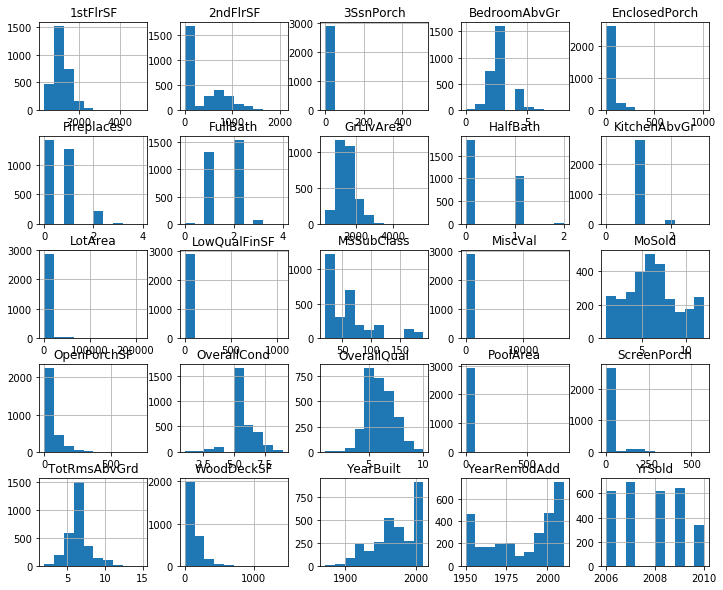

In [12]:
combined.hist(figsize = (12,10))
plt.show()

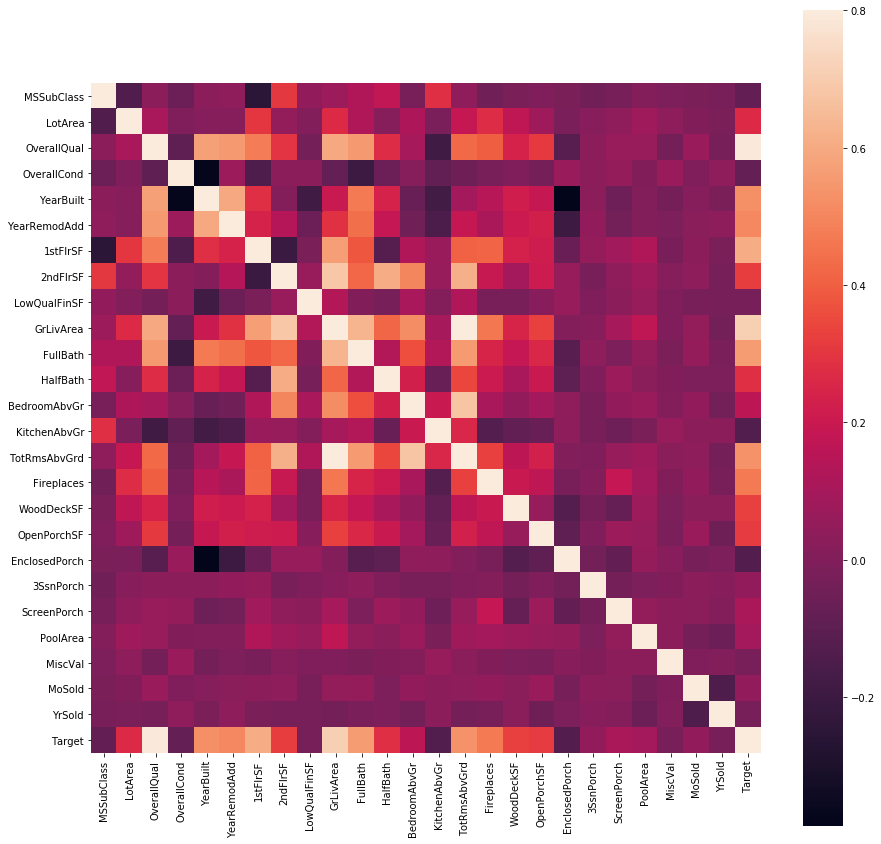

In [13]:
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [15]:
train_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition,Target
0,60,8450,7,5,2003,2003,856,854,0,1710,...,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal,208500
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,CompShg,TA,TA,CBlock,GasA,Ex,Y,Y,Normal,181500
2,60,11250,7,5,2001,2002,920,866,0,1786,...,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal,223500
3,70,9550,7,5,1915,1970,961,756,0,1717,...,CompShg,TA,TA,BrkTil,GasA,Gd,Y,Y,Abnorml,140000
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal,250000


In [16]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


combined.head()

In [18]:
combined.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,856,854,0,1710,...,1,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,0,0,1,0,0,0,0,1,0


In [20]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()

In [35]:
train.shape[1]

149

In [32]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               19200     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


In [33]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_acc', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [36]:
print(train.shape)
print(target.shape)

(1460, 149)
(1460,)


In [34]:
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 1s 471us/step - loss: 135090.7177 - mean_absolute_error: 135090.7177 - acc: 0.0000e+00 - val_loss: 52555.1835 - val_mean_absolute_error: 52555.1835 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to Weights-001--52555.18354.hdf5
Epoch 2/500
1168/1168 [==============================] - 0s 189us/step - loss: 52373.6160 - mean_absolute_error: 52373.6160 - acc: 0.0000e+00 - val_loss: 47418.4426 - val_mean_absolute_error: 47418.4426 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve
Epoch 3/500
1168/1168 [==============================] - 0s 217us/step - loss: 44913.1222 - mean_absolute_error: 44913.1222 - acc: 0.0000e+00 - val_loss: 43790.8556 - val_mean_absolute_error: 43790.8556 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve
Epoch 4/500
1168/1168 [==============================] - 0s 195us/step - loss: 41401.2132 - mean_abso


Epoch 00031: val_acc did not improve
Epoch 32/500
1168/1168 [==============================] - 0s 210us/step - loss: 31283.6739 - mean_absolute_error: 31283.6739 - acc: 0.0000e+00 - val_loss: 34053.7085 - val_mean_absolute_error: 34053.7085 - val_acc: 0.0000e+00

Epoch 00032: val_acc did not improve
Epoch 33/500
1168/1168 [==============================] - 0s 241us/step - loss: 31076.0715 - mean_absolute_error: 31076.0715 - acc: 0.0000e+00 - val_loss: 33546.7698 - val_mean_absolute_error: 33546.7698 - val_acc: 0.0000e+00

Epoch 00033: val_acc did not improve
Epoch 34/500
1168/1168 [==============================] - 0s 208us/step - loss: 30470.3933 - mean_absolute_error: 30470.3933 - acc: 0.0000e+00 - val_loss: 34008.4315 - val_mean_absolute_error: 34008.4315 - val_acc: 0.0000e+00

Epoch 00034: val_acc did not improve
Epoch 35/500
1168/1168 [==============================] - 0s 211us/step - loss: 30976.4119 - mean_absolute_error: 30976.4119 - acc: 0.0000e+00 - val_loss: 37679.7802 - va

1168/1168 [==============================] - 0s 228us/step - loss: 28491.7724 - mean_absolute_error: 28491.7724 - acc: 0.0000e+00 - val_loss: 31249.6429 - val_mean_absolute_error: 31249.6429 - val_acc: 0.0000e+00

Epoch 00063: val_acc did not improve
Epoch 64/500
1168/1168 [==============================] - 0s 194us/step - loss: 27850.1769 - mean_absolute_error: 27850.1769 - acc: 0.0000e+00 - val_loss: 31576.5723 - val_mean_absolute_error: 31576.5723 - val_acc: 0.0000e+00

Epoch 00064: val_acc did not improve
Epoch 65/500
1168/1168 [==============================] - 0s 200us/step - loss: 27629.3866 - mean_absolute_error: 27629.3866 - acc: 0.0000e+00 - val_loss: 33685.1148 - val_mean_absolute_error: 33685.1148 - val_acc: 0.0000e+00

Epoch 00065: val_acc did not improve
Epoch 66/500
1168/1168 [==============================] - 0s 222us/step - loss: 27906.2875 - mean_absolute_error: 27906.2875 - acc: 0.0000e+00 - val_loss: 30286.0818 - val_mean_absolute_error: 30286.0818 - val_acc: 0.0000

1168/1168 [==============================] - 0s 215us/step - loss: 22715.4250 - mean_absolute_error: 22715.4250 - acc: 0.0000e+00 - val_loss: 27040.2642 - val_mean_absolute_error: 27040.2642 - val_acc: 0.0000e+00

Epoch 00094: val_acc did not improve
Epoch 95/500
1168/1168 [==============================] - 0s 213us/step - loss: 23975.1845 - mean_absolute_error: 23975.1845 - acc: 0.0000e+00 - val_loss: 27301.4658 - val_mean_absolute_error: 27301.4658 - val_acc: 0.0000e+00

Epoch 00095: val_acc did not improve
Epoch 96/500
1168/1168 [==============================] - 0s 207us/step - loss: 23349.8193 - mean_absolute_error: 23349.8193 - acc: 0.0000e+00 - val_loss: 25575.6559 - val_mean_absolute_error: 25575.6559 - val_acc: 0.0000e+00

Epoch 00096: val_acc did not improve
Epoch 97/500
1168/1168 [==============================] - 0s 215us/step - loss: 24241.6514 - mean_absolute_error: 24241.6514 - acc: 0.0000e+00 - val_loss: 32573.4957 - val_mean_absolute_error: 32573.4957 - val_acc: 0.0000

1168/1168 [==============================] - 0s 207us/step - loss: 20254.5696 - mean_absolute_error: 20254.5696 - acc: 0.0000e+00 - val_loss: 28183.2305 - val_mean_absolute_error: 28183.2305 - val_acc: 0.0000e+00

Epoch 00125: val_acc did not improve
Epoch 126/500
1168/1168 [==============================] - 0s 201us/step - loss: 20713.4845 - mean_absolute_error: 20713.4845 - acc: 0.0000e+00 - val_loss: 26620.7689 - val_mean_absolute_error: 26620.7689 - val_acc: 0.0000e+00

Epoch 00126: val_acc did not improve
Epoch 127/500
1168/1168 [==============================] - 0s 191us/step - loss: 21157.5249 - mean_absolute_error: 21157.5249 - acc: 0.0000e+00 - val_loss: 24605.7964 - val_mean_absolute_error: 24605.7964 - val_acc: 0.0000e+00

Epoch 00127: val_acc did not improve
Epoch 128/500
1168/1168 [==============================] - 0s 217us/step - loss: 19759.1793 - mean_absolute_error: 19759.1793 - acc: 0.0000e+00 - val_loss: 25790.9960 - val_mean_absolute_error: 25790.9960 - val_acc: 0.0

1168/1168 [==============================] - 0s 214us/step - loss: 19366.2651 - mean_absolute_error: 19366.2651 - acc: 0.0000e+00 - val_loss: 26971.6123 - val_mean_absolute_error: 26971.6123 - val_acc: 0.0000e+00

Epoch 00156: val_acc did not improve
Epoch 157/500
1168/1168 [==============================] - 0s 221us/step - loss: 19706.0239 - mean_absolute_error: 19706.0239 - acc: 0.0000e+00 - val_loss: 22304.5484 - val_mean_absolute_error: 22304.5484 - val_acc: 0.0000e+00

Epoch 00157: val_acc did not improve
Epoch 158/500
1168/1168 [==============================] - 0s 207us/step - loss: 19026.5516 - mean_absolute_error: 19026.5516 - acc: 0.0000e+00 - val_loss: 25785.7042 - val_mean_absolute_error: 25785.7042 - val_acc: 0.0000e+00

Epoch 00158: val_acc did not improve
Epoch 159/500
1168/1168 [==============================] - 0s 228us/step - loss: 20445.6243 - mean_absolute_error: 20445.6243 - acc: 0.0000e+00 - val_loss: 24357.9587 - val_mean_absolute_error: 24357.9587 - val_acc: 0.0


Epoch 00186: val_acc did not improve
Epoch 187/500
1168/1168 [==============================] - 0s 226us/step - loss: 17903.5670 - mean_absolute_error: 17903.5670 - acc: 8.5616e-04 - val_loss: 26877.7491 - val_mean_absolute_error: 26877.7491 - val_acc: 0.0000e+00

Epoch 00187: val_acc did not improve
Epoch 188/500
1168/1168 [==============================] - 0s 222us/step - loss: 19524.3425 - mean_absolute_error: 19524.3425 - acc: 0.0000e+00 - val_loss: 28868.3456 - val_mean_absolute_error: 28868.3456 - val_acc: 0.0000e+00

Epoch 00188: val_acc did not improve
Epoch 189/500
1168/1168 [==============================] - 0s 202us/step - loss: 17331.7435 - mean_absolute_error: 17331.7435 - acc: 0.0000e+00 - val_loss: 22280.6549 - val_mean_absolute_error: 22280.6549 - val_acc: 0.0000e+00

Epoch 00189: val_acc did not improve
Epoch 190/500
1168/1168 [==============================] - 0s 214us/step - loss: 18637.2653 - mean_absolute_error: 18637.2653 - acc: 8.5616e-04 - val_loss: 22600.9119 


Epoch 00217: val_acc did not improve
Epoch 218/500
1168/1168 [==============================] - 0s 233us/step - loss: 17232.0241 - mean_absolute_error: 17232.0241 - acc: 0.0000e+00 - val_loss: 21652.4431 - val_mean_absolute_error: 21652.4431 - val_acc: 0.0000e+00

Epoch 00218: val_acc did not improve
Epoch 219/500
1168/1168 [==============================] - 0s 237us/step - loss: 18322.7606 - mean_absolute_error: 18322.7606 - acc: 0.0000e+00 - val_loss: 21171.6822 - val_mean_absolute_error: 21171.6822 - val_acc: 0.0000e+00

Epoch 00219: val_acc did not improve
Epoch 220/500
1168/1168 [==============================] - 0s 225us/step - loss: 19779.1200 - mean_absolute_error: 19779.1200 - acc: 0.0000e+00 - val_loss: 20894.0017 - val_mean_absolute_error: 20894.0017 - val_acc: 0.0000e+00

Epoch 00220: val_acc did not improve
Epoch 221/500
1168/1168 [==============================] - 0s 216us/step - loss: 16743.5307 - mean_absolute_error: 16743.5307 - acc: 0.0000e+00 - val_loss: 23334.2712 


Epoch 00248: val_acc did not improve
Epoch 249/500
1168/1168 [==============================] - 0s 201us/step - loss: 17392.1752 - mean_absolute_error: 17392.1752 - acc: 0.0000e+00 - val_loss: 21322.2620 - val_mean_absolute_error: 21322.2620 - val_acc: 0.0000e+00

Epoch 00249: val_acc did not improve
Epoch 250/500
1168/1168 [==============================] - 0s 211us/step - loss: 16655.5302 - mean_absolute_error: 16655.5302 - acc: 0.0000e+00 - val_loss: 22714.7678 - val_mean_absolute_error: 22714.7678 - val_acc: 0.0000e+00

Epoch 00250: val_acc did not improve
Epoch 251/500
1168/1168 [==============================] - 0s 212us/step - loss: 15756.0865 - mean_absolute_error: 15756.0865 - acc: 0.0000e+00 - val_loss: 20891.6164 - val_mean_absolute_error: 20891.6164 - val_acc: 0.0000e+00

Epoch 00251: val_acc did not improve
Epoch 252/500
1168/1168 [==============================] - 0s 207us/step - loss: 17529.2541 - mean_absolute_error: 17529.2541 - acc: 0.0000e+00 - val_loss: 20947.3832 


Epoch 00279: val_acc did not improve
Epoch 280/500
1168/1168 [==============================] - 0s 211us/step - loss: 15575.9297 - mean_absolute_error: 15575.9297 - acc: 0.0000e+00 - val_loss: 19792.9116 - val_mean_absolute_error: 19792.9116 - val_acc: 0.0000e+00

Epoch 00280: val_acc did not improve
Epoch 281/500
1168/1168 [==============================] - 0s 222us/step - loss: 15397.0640 - mean_absolute_error: 15397.0640 - acc: 0.0000e+00 - val_loss: 21481.7710 - val_mean_absolute_error: 21481.7710 - val_acc: 0.0000e+00

Epoch 00281: val_acc did not improve
Epoch 282/500
1168/1168 [==============================] - 0s 215us/step - loss: 15890.8434 - mean_absolute_error: 15890.8434 - acc: 0.0000e+00 - val_loss: 21087.7871 - val_mean_absolute_error: 21087.7871 - val_acc: 0.0000e+00

Epoch 00282: val_acc did not improve
Epoch 283/500
1168/1168 [==============================] - 0s 217us/step - loss: 16511.4789 - mean_absolute_error: 16511.4789 - acc: 0.0000e+00 - val_loss: 20468.6784 

KeyboardInterrupt: 

In [ ]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').Id,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

predictions = NN_model.predict(test)
make_submission(predictions[:,0],'submission(NN).csv')